# CMSC478 Machine Learning - Spring 2020

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-1: Binary Classification, Linear Regression and Logistic Regression</font>

Author: Sanaa Mironov
UMBC ID: LJ67374

## Overview and Learning Objectives

So far, you've learned about the basics and fundamental concepts in Machine Learning such as supervised learning (e.g. classification and regression) vs unsupervised learning (e.g. clustering), overfitting, and model evaluation. You learned that two of the most common approaches in supervised learning are regression and classification. In this assignment, you are going to pratice what you've learned so far by building ML models and applying them on data.

<b>Very Important Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping lines would be a major source of making mistakes and losing points in your first assignment! Also notice that this assignment has <b>three parts</b> and requires a lot of work. You're strongly recommended to get started early and plan to finish well before the due. Technical problems or other issues/questions on the due date or just a day before would NOT be accepted as an excuse to delay your submission. Also notice that some outputs are provided to you for your reference and some are not provided intentionally. You may NOT share the outputs and/or the code, the solution and the answers in Piazza.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML models in pratice. 
- practice your Python skills - and possibly learn a couple of new "Pythonic" tricks!
- pratice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Binary Classification

Binary classification means you are classifying only two classes/labels. You are going to build a binary classifier that can classify breats cancer.

The first thing to do is downloading [the breast cancer dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data). Read the feature specifications in Kaggle page to learn more about the data. You can directly download the data from [the course GitHub repo here](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-1/breast_cancer.csv) and save it in the same working directory as your notebook. Next, you should load the data using `pandas`.

In [1]:
#import Pandas framework
import pandas as pd
#Pandas works off of Numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset using pd
data = pd.read_csv('breast_cancer.csv')

# Show the first five rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> Let's see what the type of `data` is.

In [3]:
type(data)

pandas.core.frame.DataFrame

`DataFrame` is a data structure to contain datasets in pandas. Read pandas documentation to learn more about it [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Since this is a classification (supervised learning) ML model, you have both the features and the labels for training and testing, and everything has been stored in `data` DataFrame. You should always check if your dataset has `NA` or `Null` values and decide about it, usually drop `NA`.

In [4]:
data.isnull().sum()
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> Also, the first column `id` doesn't seem to provide any useful info to ML model, so drop it.

In [5]:
len(data['id'].unique())

569

In [6]:
data.drop(["id"], axis=1, inplace=True)

> Now, you can extract features and labels from `data`. Your classifier should attempt to predict `diagnosis` so that is your target/label column.

In [7]:
# Organize data to feature vector X and label vector y
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [8]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)

Features shape:  (569, 30)
Labels shape:  (569,)


> Your `X` dataframe now only contains features, hence has 30 columns whereas `y` has now become a 1D vector containing labels only. Notice that `y` has 569 labels equal to the number of data records in the feature vector.

In [9]:
# X should no longer contain the diagnosis which is target/label column - i.e. the column to be predicted
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# y should only contain diagnosis - target/label column
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [11]:
y.unique()

array(['M', 'B'], dtype=object)

> The two classes (aka labels) here are `M` and `B` representing `malignant` and `benign` which refers to the tumors you are going to classify. You need to represent them by `1` and `0` respectively. In other words, to use sklearn classifiers and score metrics, you need to convert the categorical lables.

In [12]:
# Encoding categorical labels M and B to 1 and 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

> When you have multiple features with different scales/ranges, you should consider standardizing them. There are different ways to standardize and to normalize the feature vector. One way is using scikit-learn modules.

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We do this by importing another module from scikit learn.

In [15]:
from sklearn.model_selection import train_test_split

And now, we can split the data. The split ratio we are going to choose is 0.75 for training and 0.25 for testing, but we only need to specify one of them `test_size` here.

In [16]:
# Split the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
# Check the shapes of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (426, 30)
y_train shape:  (426,)
X_test shape:  (143, 30)
y_test shape:  (143,)


And, we can now choose which classifier from the built-in classifiers in sklearn we want to use. We are going to use two classifiers that we've seen in the lectures so far: Stochastic Gradient Descent Classifier and Logistic Regression.

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

Now complete the following cell. You may want to consult with the textbook code snippets. Notice that we use [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.fit) method for training and [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.predict) method for making predictions (testing). Click on the methods and read their documentation.

Enter your code in the blocks that start with `### START CODE HERE ###`. In some cells, you simply replace <font color="green"><b>None</b></font> with your code whereas in some others you enter multiple lines of your code in one cell.

## <font color="red"> Required Coding

In [19]:
### START CODING HERE ###

# Create a SGDClassifier with random_state=0
#sgd_clf = SGDClassifier(loss="log",random_state=0)
sgd_clf = SGDClassifier(random_state=0)


# Fit sgd_clf model on training set
sgd_clf.fit(X_train, y_train)

# Create a LogisticRegression classifier with solver='liblinear' and random_state=0
log_reg_clf = LogisticRegression(solver='liblinear',random_state=0)

# Fit log_reg_clf on training set
log_reg_clf.fit(X_train, y_train)

### END CODING HERE ###

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Now, make predictions on testing set and store the results

### START CODING HERE ###
y_pred_sgd = sgd_clf.predict(X_test)
y_pred_log_reg = log_reg_clf.predict(X_test)
### END CODING HERE ###

In [21]:
print(type(y_pred_sgd), type(y_pred_log_reg))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
assert y_pred_sgd.shape == y_pred_log_reg.shape, "Prediction shapes don't match!"
print(y_pred_sgd.shape)
print(y_pred_log_reg.shape)
#had 143 prediction bc we had 143 in our test set

(143,)
(143,)


> Next, evaluate how your classifiers perform.

## <font color="red"> Required Coding

In [23]:
### START CODING HERE ###

# Import the necessary module from sklearn for accuracy_score, precision_score and recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# compute the accuracy, precision and recall
#y_test to y_predicted(X_test)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)


# Print the accuracy 
print("SGD Accuracy: ", acc_sgd)
print("SGD Precision: ", precision_sgd)
print("SGD Recall: ", recall_sgd)

### END CODING HERE ###

SGD Accuracy:  0.951048951048951
SGD Precision:  0.8947368421052632
SGD Recall:  0.9807692307692307


> Next, the following cells show how you can plot ROC curve of logistic regression classifier using `fpr`, `tpr`, and `threshold` returned by [`metrics.roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and class probabilities using [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) method of [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [24]:
# Get class probabilities, fpr, tpr and threshold for Logistic Regression.
import sklearn.metrics as metrics
log_reg_probs = log_reg_clf.predict_proba(X_test)
log_reg_preds = log_reg_probs[:,1]
log_reg_fpr, log_reg_tpr, log_reg_threshold = metrics.roc_curve(y_test, log_reg_preds)
log_reg_roc_auc = metrics.auc(log_reg_fpr, log_reg_tpr)

Text(0.5, 0, 'False Positive Rate')

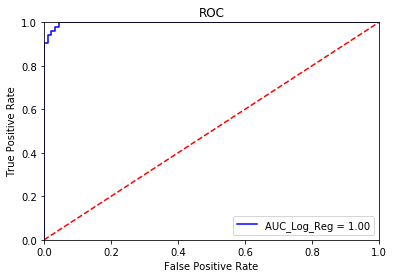

In [25]:
# Plot ROC curve for logistic regression classifier
plt.title('ROC')
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label = 'AUC_Log_Reg = %0.2f' % log_reg_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Next, you should plot ROC curves of both classifiers in one plot. Notice that some classifiers like SGD don't have `predict_proba` method, and in that case you can use [`decision_function`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function) method to get the scores.

## <font color="red"> Required Coding

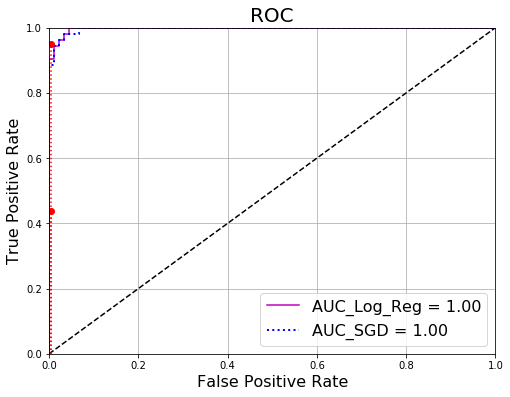

In [26]:
# Plot ROC for both classifiers with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.

# Hint1: You may use LogisticRegression ROC curve as a reference for writing your code.
# Hint2: sgd with 'hinge' loss doesn't have predict_proba method,
# instead, you should directly use decision_function method to compute sgd_preds
### START CODING HERE ###

# Write as many number of lines of code as needed here.

from sklearn.model_selection import cross_val_predict

# Check with Ta about this
#y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, method ="decision_function")
#sgd_fpr, sgd_tpr, sgd_thresholds = metrics.roc_curve(y_train, y_scores_sgd)

#this is based on his hints
y_scores_sgd = sgd_clf.decision_function(X_test)
sgd_fpr, sgd_tpr, sgd_thresholds = metrics.roc_curve(y_test, y_scores_sgd)

sgd_roc_auc = metrics.auc(sgd_fpr, sgd_tpr)
    
#function to plot SGD function    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,'b:',linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)    
    
     
plt.figure(figsize=(8, 6))
plt.title('ROC', fontsize = 20)
#plot log regression 
plt.plot(log_reg_fpr, log_reg_tpr, 'm', label = 'AUC_Log_Reg = %0.2f' % log_reg_roc_auc)
#plot SGD  
plot_roc_curve(sgd_fpr, sgd_tpr, 'AUC_SGD = %0.2f' % sgd_roc_auc)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc ="lower right", fontsize=16)
plt.show()    


### END CODING HERE ###

In [27]:
y_pred_sgd.dtype.name

'int64'

In [28]:
print("y_pred_sgd shape: ", y_pred_sgd.shape)

y_pred_sgd shape:  (143,)


In [29]:
y_pred_log_reg.dtype.name

'int64'

In [30]:
print("y_pred_log_reg shape: ", y_pred_log_reg.shape)

y_pred_log_reg shape:  (143,)


### Part I Questions

Answer the following question HERE:

Q1[1 point] - What is the data type of `y_pred_sgd` and `y_pred_log_reg` and what are their shapes? Explain why you get such a shape for predictions.

A1 - The data type for `y_pred_sgd` and `y_pred_log_reg`  is numpy.ndarray with int as the data type. The shape for both is (143,). This is because we started out with 143 prediction and had 143 in our test set as well. 


Q2[2 points]- Name two hyperparameters for SGD and two hyperparameters for LogisticRegression. You may check their sklearn documentation.

A2 - SGD Hyperparameters we used include loss = 'hinge' and random_state = 0. LogisticRegression hyperparameters include solver='liblinear' and random_state=0. Both os these have more hyperarameters,but im using the ones we used to twick the classfiers.

Q3[2 points]- Looking at ROC curves of Logistic Regression and SGD, and without seeing AUC scores, how would you determine which classifier has a better performance?

A3 - ROC curve plots the true positive rate against false positive rate. Comparing the two  classfier, Logistic regreeesion is performing better than SGD because its ROC curve is much closer to the top-left corner. 

## Part II - Linear Regression Using Closed-Form Solution (Normal Equation)

In Part II, you're going to generate some data and then use closed-form solution for linear regression to fit the data.

Generate data points based on the following linear equation added by [the noise with “standard normal” distribution](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). You may refer to the slides/textbook code snippets.

$$y = 3 + 5X + Gaussian Noise$$

## <font color="red"> Required Coding

In [31]:
X = 2 * np.random.rand(100, 1)

### START CODING HERE ###
# Compute y based on the linear equation given above and add random gaussian noise
y = 3 + 5 * X + np.random.randn(100, 1)
### END CODING HERE ###

print(X[0])
print(y[0])

[0.55063712]
[4.77996953]


In [32]:
X.shape

(100, 1)

In [33]:
y.shape

(100, 1)

[0, 2, 0, 15]

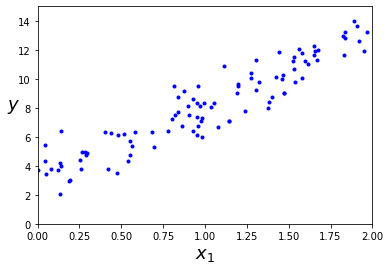

In [34]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [35]:
### START CODING HERE ###
# add x0 = 1 to each instance using np.c_
X_b = np.c_[np.ones((100, 1)), X]  

# Compute theta_best using normal equation
#compute the inverse of a matrix and dot method of matrix multipication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
### END CODING HERE ###

theta_best

array([[3.10764685],
       [4.9772465 ]])

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [37]:
### START CODING HERE ###
# Make predictions on new data by computing the dot product of X_new_b and theta_best
y_predict = X_new_b.dot(theta_best)
### END CODING HERE ###

y_predict

array([[ 3.10764685],
       [13.06213985]])

[0, 2, 0, 15]

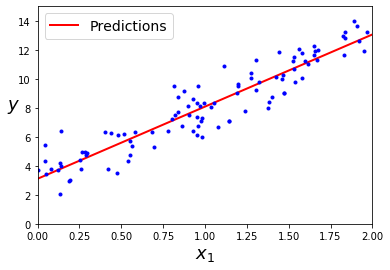

In [38]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

## Part III - Regression Using Least Mean Square and RMSE

In Part III, you will implement three functions to build and use regression models: `train`, `use`, and `rmse` and then you apply them to some weather data.

Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

<b>Hints:</b>
- Remember from regression performance measure that RMSE equation is:

$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}\left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}
$

where $h(\mathbf{x}^{(i)})$ is your prediction versus $y^{(i)}$ target values. Notice that you will implement rmse twice, once in `train` function, and once as a separate function named `rmse`. In the `rmse` function when you work with vectorized form of Y and T, you can simply subtract and square them but you need to get the mean and the square root as well.<br>

- Also notice that in Python, you may use `@` as matrix multiplication operator between vectors. That is a simpler notation came in recent versions of Python 3.5+ as an alternative for [`numpy.matmul`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html). This would be used between two matrices whereas when you multiply a single scalar to a matrix such as `learning_rate` multiplied by a matrix, you may use `*` operator.


- During the training and in each iteration, weights would be updated as the following: 
`w = w + learning_rate * X[n:n + 1, :].T * error`

## <font color="red"> Required Coding

In [39]:
### START CODING HERE ###
from sklearn.metrics import mean_squared_error
import math

def train(X, T, learning_rate, n_epochs, verbose=False):

    #print(T[0])
    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X, axis=0)
    Xstds = np.std(X, axis=0)
    Tmeans = np.mean(T, axis=0)
    Tstds = np.std(T, axis=0)
    
    # Use the means and standard deviations to standardize X and T
    X = (X-Xmeans)/Xstds
    T = (T-Tmeans)/Tstds

    # Insert the column of constant 1's as a new initial column in X
    #ones=np.ones((X.shape[0],1))
    #X = np.append(ones, X, 1)
    #num_rows = X.shape[0]
    X = np.c_[np.ones((X.shape[0],1)), X]
    
    # Initialize weights to be a numpy array of the correct shape and all zero values.
    n_samples, n_inputs = X.shape
    n_outputs = T.shape[1]
    w = np.zeros((n_inputs,n_outputs))

    for epoch in range(n_epochs):
        sqerror_sum = 0
        for n in range(n_samples):
       
            # Use current weight values to predict output for sample n (provided here), then
            # calculate the error, and
            # update the weight values.
            y = X[n:n + 1, :] @ w      # predicted value, y, for sample n
            error = y - T[n:n + 1, :]
            w = w - learning_rate * X[n:n + 1, :].T * error  

            #y_with_new_weights = X[n:n + 1, :] @ w 
            #error_with_new_weigths = mean_squared_error(T[n], y_with_new_weights)

            # Add the squared error to sqerror_sum
            sqerror_sum += error * error
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            # Compute RMSE
            rmse = np.sqrt(sqerror_sum/n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}
### END CODING HERE ###

In [40]:
### START CODING HERE ###
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans'])/model['Xstds']
    # Insert the column of constant 1's as a new initial column in X
    #num_rows = X.shape[0]
    X = np.c_[np.ones((X.shape[0],1)), X]
    # Predict output values using weights in model
    Y = X @ model['w'] 
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    Y = (Y * model['Tstds']) + model['Tmeans']
    # Return the unstandardized output values
    return Y
### END CODING HERE ###

In [41]:
### START CODING HERE ###
#Y: is an  𝑁  x  𝐾  matrix of predictions produced by use.
#T: is the  𝑁  x  𝐾  matrix of target values.
#result: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in Y and T.
def rmse(Y, T):
    return np.mean((Y-T)**2)**0.5
    
### END CODING HERE ###

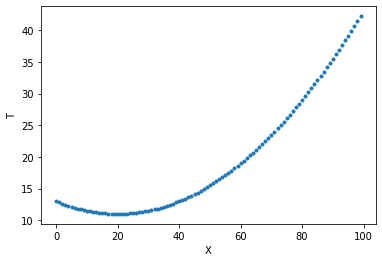

In [42]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [43]:
# Your output might slightly differ due to randomness
model = train(X, y, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 1.00
Epoch 10 RMSE 1.00
Epoch 15 RMSE 1.00
Epoch 20 RMSE 1.00
Epoch 25 RMSE 1.00
Epoch 30 RMSE 1.00
Epoch 35 RMSE 1.00
Epoch 40 RMSE 1.00
Epoch 45 RMSE 1.00
Epoch 50 RMSE 1.00


{'w': array([[-0.01612389],
        [-0.07651488]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([8.07981875]),
 'Tstds': array([2.94048121])}

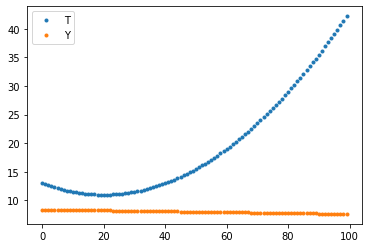

In [44]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

In [45]:
result = rmse(Y, T)
result
#I am not sure why my rmse is so high, Ive regone this so many time and still i get the same thing over and over again

14.905882197895851

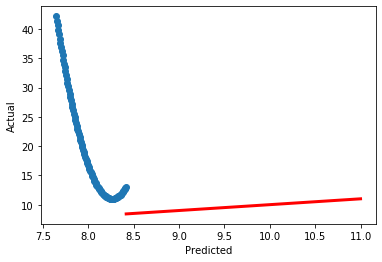

In [46]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)
#This graph is weird,super weird!

In [47]:
# Just for testing if your implementation is correct
# You should get the provided correct output with RMSE decreasing to 0.12
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12


### Correct Output <br>
`Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12`

## Weather Data

Now that your functions are working, we can apply them to some real data. You will use data
from  [Colorado State University's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file directly from the course GitHub repo [here](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-1/weather.data)

## <font color="red"> Required Coding

Read in the data into variable `df` using `pandas.read_csv` like you did above for binary classification.
Notice that missing values in this dataset are indicated by the string `'***'`. This should be specified using `na_values` argument of `read_csv`. You must check if there are missing values using DataFrame `.isna().sum()` and drop them using DataFrame `.dropna()` method.

In [48]:
### START CODING HERE ###
df = pd.read_csv('weather.data',na_values='***',sep='\s+', engine='python')
### END CODING HERE ###

In [49]:
df

,Year,Mo,Dy,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,2000,1,1,3.477,11.858,-4.905,0.331,0.614,0.233,0.0,8.252
1,2000,1,2,0.363,6.415,-5.690,0.396,0.872,0.392,0.0,8.742
2,2000,1,3,-4.448,1.153,-10.049,0.185,0.573,0.274,0.0,10.741
3,2000,1,4,-2.465,6.562,-11.493,0.245,0.710,0.254,0.0,4.116
4,2000,1,5,1.558,6.723,-3.608,0.228,0.540,0.132,0.0,15.974
...,...,...,...,...,...,...,...,...,...,...,...
7323,2020,1,22,6.225,11.304,1.146,0.392,0.621,0.207,0.0,13.838
7324,2020,1,23,2.485,5.630,-0.661,0.275,0.464,0.291,0.0,7.546
7325,2020,1,24,1.588,9.132,-5.956,0.380,0.799,0.313,0.0,3.920
7326,2020,1,25,4.991,12.409,-2.426,0.432,0.755,0.238,0.0,6.037


In [50]:
df.shape

(7328, 11)

In [51]:
### START CODING HERE ###
# Check if there are na's in df
df.isnull().sum()
df.isna().sum()
### END CODING HERE ###

Year      0
Mo        0
Dy        0
tave     33
tmax     33
tmin     33
vp       33
rhmax    33
rhmin    33
pp       33
gust     33
dtype: int64

In [52]:
df.count()

Year     7328
Mo       7328
Dy       7328
tave     7295
tmax     7295
tmin     7295
vp       7295
rhmax    7295
rhmin    7295
pp       7295
gust     7295
dtype: int64

In [53]:
### START CODING HERE ###
# Drop na
#Drop the rows where at least one element is missing
df = df.dropna()
### END CODING HERE ###

In [54]:
### START CODING HERE ###
# Now, check again if there is any more na values left
df.isnull().sum()
df.isna().sum()
### END CODING HERE ###

Year     0
Mo       0
Dy       0
tave     0
tmax     0
tmin     0
vp       0
rhmax    0
rhmin    0
pp       0
gust     0
dtype: int64

In [55]:
# Check df columns
df.columns

Index(['Year', 'Mo', 'Dy', 'tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin',
       'pp', 'gust'],
      dtype='object')

In [56]:
df.head()

,Year,Mo,Dy,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,2000,1,1,3.477,11.858,-4.905,0.331,0.614,0.233,0.0,8.252
1,2000,1,2,0.363,6.415,-5.690,0.396,0.872,0.392,0.0,8.742
2,2000,1,3,-4.448,1.153,-10.049,0.185,0.573,0.274,0.0,10.741
3,2000,1,4,-2.465,6.562,-11.493,0.245,0.710,0.254,0.0,4.116
4,2000,1,5,1.558,6.723,-3.608,0.228,0.540,0.132,0.0,15.974


In [57]:
df.shape

(7295, 11)

Next, create a linear model that predicts the next day's average temperature `tave` from the previous day's values of:
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

As a hint on how to do this, here is a list with these column names:

In [58]:
# List of column names
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']

## <font color="red"> Required Coding

In [59]:
### START CODING HERE ###
# Select those eight columns in Xnames from df and convert the result to a numpy array - Hint: use .values
data = df.iloc[:, 3:].values

# Assign X to be all columns and all but the last row - Hint: Review slicing notebook shared with you
X = data[:-1,:]

# Assign T to be just the first column (tave) and all but the first sample/row.
T = data[1:,0:1] #remove frist row and all other rows and then just first column
### END CODING HERE ###

In [60]:
data.shape

(7295, 8)

In [61]:
X.shape

(7294, 8)

In [62]:
T.shape

(7294, 1)

> So now the first row (sample) in `X` is associated with the first row (sample) in `T` which is tave for the following day. Next, train the model. Run it several times with different `learning_rate` and `n_epochs` values to produce decreasing errors, or at least with an RMSE of less than 0.40

In [63]:
### START CODING HERE ###

# Use the function train to train a model for the X and T data.
# Try different values for learning_rate and n_epochs
model = train(X, T, 0.01, 50, True) #RMSE = .34 n_epochs = 50
#model = train(X, T, 0.01, 100, True) #RMSE = .34  n_epochs=100

#model = train(X, T, 0.001, 50, True) #RMSE =.33 n_epochs=50
#model = train(X, T, 0.001, 100, True) #RMSE =.33 n_epochs=100

#model = train(X, T, 0.0001, 100, True) #RMSE = .33  n_epochs=100
#model = train(X, T, 0.0001, 50, True) #RMSE =.33  n_epochs=50

#model = train(X, T, 0.1, 50, True) #RMSE = 148167216559755.28
#model = train(X, T, 0.001, 1000, True) #to long of a wait


# Use the use function
Y = use(X, model)

#graph below


### END CODING HERE ###

Epoch 5 RMSE 0.34
Epoch 10 RMSE 0.34
Epoch 15 RMSE 0.34
Epoch 20 RMSE 0.34
Epoch 25 RMSE 0.34
Epoch 30 RMSE 0.34
Epoch 35 RMSE 0.34
Epoch 40 RMSE 0.34
Epoch 45 RMSE 0.34
Epoch 50 RMSE 0.34


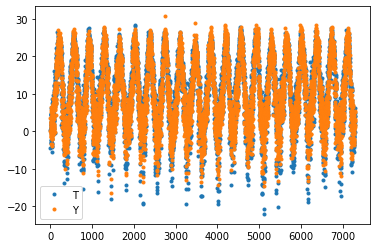

In [64]:
plt.clf()
# Plot T versus predicted Y values to show how well the model is working
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

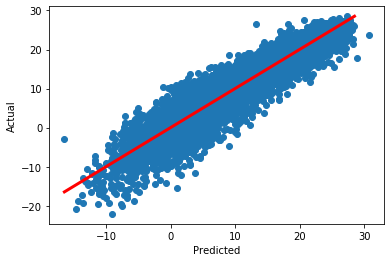

In [65]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

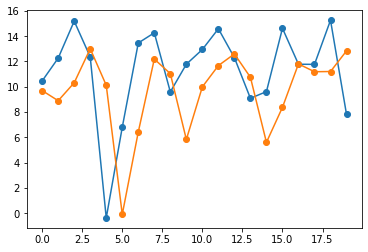

In [66]:
plt.plot(T[100:120], '-o')
plt.plot(Y[100:120], '-o')

> Print the weight values in the resulting model along with their corresponding variable names in `Xnames`. Use the relative magnitude of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [67]:
for i in range(len(Xnames)):
    print(f"{Xnames[i]:6} {model['w'][i,0]:9.5f}")

tave    -0.02895
tmax     0.21513
tmin     0.28302
vp       0.12310
rhmax    0.36673
rhmin   -0.06618
pp      -0.03332
gust     0.03479


### Part III Question

Anser the following question HERE:

(5 points) Whcih features (input variables) are most significant in predicting the changes in the tave values? Name top three.
    
    1. rhmax pr vp (depending on the eta and iteration size)
    2. tmin 
    3. tmax
    

## Grading

Assignment-1 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I implementaion and correct outputs have 30 points:
    - 20 points: classifiers, training, testing and model evaluation.
    - 10 points: correct plot of 2 ROC for 2 classifiers in one plot with different colors.

- Part I questions have 5 points.

- Part II normal equation (and correct outputs) has 5 points.

- Part III has 60 points (55 points implementation and 5 points question).

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A1.ipynb```. So, for me it would be `Vafaei-A1.ipynb`. Submit the completed notebook using the ```Assignment-1``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Wednesday March 4th, 11:59PM.</b></font>

### Acknowledgement

Special thanks to Professor Charles Anderson from Colorado State University.